# Reconhecimento de imagens baseado em histograma

## Package imports

In [43]:
import os
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

## Hyper parâmetros e constantes

In [1]:
path = "dataset/Vistex"

## Entrada

In [3]:
input_img = "c001_001"
n_imgs = 2

## PDF, histogram and misc functions

In [26]:
def to_gray(img):
    w, h, nc = img.shape
    res = np.zeros((w,h), dtype=np.uint8 )

    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    res = np.divide(np.sum([r,g,b], dtype=np.uint16, axis=0), 3)
    res = res.astype(np.uint8)
    
    return res

In [28]:
def img_to_gray(imgs):
    if len(imgs)>1:
        res = list()
        for img in imgs:
            res.append( to_gray(img) )
    else:
        res = to_gray(imgs)
    return res
        

In [48]:
def gray_hist(src_img):
    w, h = src_img.shape
    res = np.zeros(256, dtype=np.uint8)
    
    for x in range(w):
        for y in range(h):
            res[src_img[x,y]] += 1
    return res

In [ ]:
def dist_pdf(src_img, comp_img):
    pass

## Read images

In [15]:
def sorted_imgs(dir):
    return sorted(os.listdir(dir), key=lambda x: x.split('.')[0])

In [18]:
img_names = [os.path.join(path, x) for x in sorted_imgs(path) ]

imgs = io.ImageCollection(img_names)

In [21]:
len(imgs)

864

In [22]:
imgs[0].shape

(128, 128, 3)

In [32]:
gray_imgs = img_to_gray(imgs)
len(gray_imgs)

864

## Show histogram graphs

### Gray level

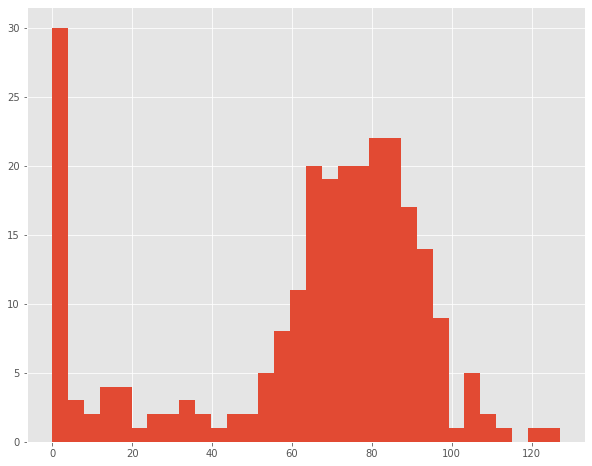

In [60]:
ret = gray_hist(gray_imgs[0])

plt.figure(figsize=[10,8])
plt.style.use('ggplot')

plt.hist(ret, bins=32)
plt.show()

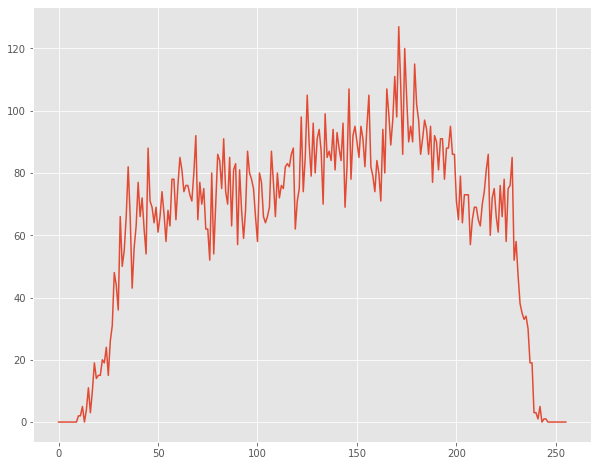

In [62]:
plt.figure(figsize=[10,8])
plt.plot(ret)
plt.show()

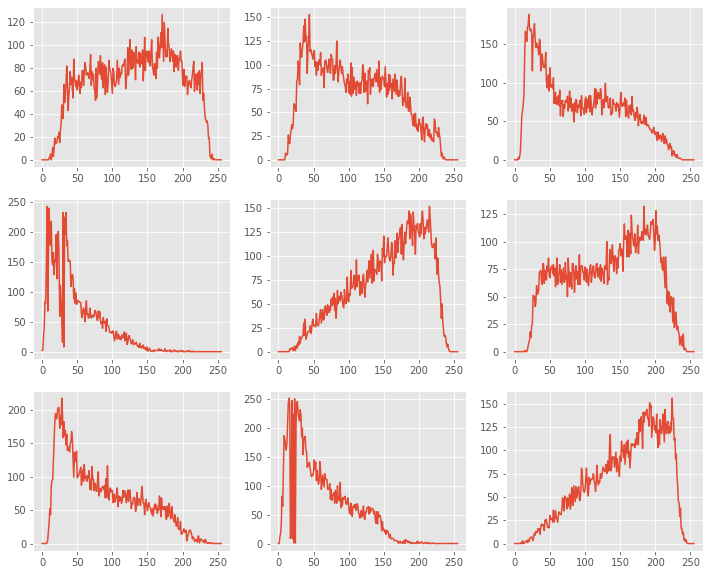

In [67]:
f, ax = plt.subplots(3,3, figsize=[12,10])

for i in range(3):
    for j in range(3):
        ret = gray_hist(gray_imgs[i*3+j])
        
        ax[i,j].plot(ret)
plt.show()